In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from sklearn.cluster import KMeans,DBSCAN
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import TfidfVectorizer

In [71]:
df = pd.read_csv('./customs_mail.csvv', low_memory=True)
df_etc = df[df['우편물검사결과코드.2'] =='99-기타'].reset_index(drop=True)

In [73]:
df_etc['검사결과내용'] = df_etc['검사결과내용'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
df_etc['검사결과내용'] = df_etc['검사결과내용'].str.replace("기타농산물","농산물").str.replace("이삿짐","이사화물").str.replace("담배반송"," 담배").str.replace("담배 반송"," 담배").str.replace("농산물반송"," 농산물").str.replace("농산물 반송"," 농산물").str.replace("이사화물 반송","이사화물").str.replace("기타담배반송","담배").str.replace("과일반송","과일").str.replace("기타 담배반송","담배").str.replace("기타 이사화물반송","이사화물")
df_etc['검사결과내용'] = df_etc['검사결과내용'].str.replace("기타비전자반송","비전자상거래").str.replace("기타비전자상거래물품","비전자상거래").str.replace("농산물  담배","담배").str.replace("반송농산물","농산물").str.replace("비전자 반송","비전자상거래")\
.str.replace("비전자상거래 반송","비전자상거래").str.replace("비전자상거래물품","비전자상거래").str.replace("비전자상거래반송","비전자상거래").str.replace("이사물품 반송","이사물품")
df_etc['검사결과내용'] = df_etc['검사결과내용'].str.replace("기타 담배","담배").str.replace("기타담배","담배").str.replace("기타반송","기타").str.replace("농산물 담배","담배").str.replace("농산물담배","담배")\
.str.replace("반송담배","담배").str.replace("비전자반송","비전자상거래").str.replace("인근분산반입   농산물","농산물").str.replace("이사물품반송","이사물품")
df_test = df_etc.copy()

C:\Users\P-이종권\AppData\Local\Temp\ipykernel_14828\70231399.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_etc['검사결과내용'] = df_etc['검사결과내용'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


In [81]:
df_test.groupby('검사결과내용')['검사결과내용'].count().sort_values(ascending=False)

검사결과내용
 농산물           5544
 담배            2257
농산물            2169
담배             1743
비전자상거래         1193
               ... 
반송연초고형물           1
반송전자상거래물품아님       1
반송지재권침해물품         1
반송처리 담배와 홍삼       1
휠가격재감요            1
Name: 검사결과내용, Length: 373, dtype: int64

In [85]:
df_test.head(3)

,관리년도,검사일자,검사년도,우편물검사결과코드,우편물검사결과코드.1,우편물검사결과코드.2,검사결과내용
0,2019,20191105,2019,99,기타,99-기타,농산물말린고추비전자상거래
1,2019,20191105,2019,99,기타,99-기타,농산물말린고추비전자상거래
2,2019,20191113,2019,99,기타,99-기타,농산물


In [86]:
tfidf_matrix

<14563x375 sparse matrix of type '<class 'numpy.float64'>'
	with 15182 stored elements in Compressed Sparse Row format>

In [84]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df_test['검사결과내용']) 
idf = tfidf_vectorizer.idf_
# print(dict(zip(tfidf_vectorizer.get_feature_names(), idf)))

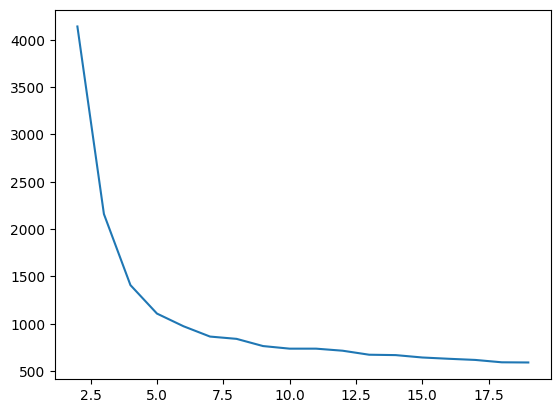

In [88]:
itr = []
for i in range(2,20):
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(tfidf_matrix)
    itr.append(km.inertia_)
    
plt.plot(range(2,20), itr)
plt.show()    

In [89]:
model = KMeans(n_clusters=7, random_state=42, init='k-means++',max_iter=100, n_init=1)
model.fit(tfidf_matrix)

KMeans(max_iter=100, n_clusters=7, n_init=1, random_state=42)

In [90]:
model.labels_

array([5, 5, 1, ..., 1, 1, 1])

In [94]:
df_test['cluster'] = df_test.groupby('검사결과내용').ngroup().apply(lambda x: model.labels_[x])
# df_test.groupby('검사결과내용')['검사결과내용'].count().sort_values(ascending=False)

검사결과내용
 농산물           5544
 담배            2257
농산물            2169
담배             1743
비전자상거래         1193
               ... 
반송연초고형물           1
반송전자상거래물품아님       1
반송지재권침해물품         1
반송처리 담배와 홍삼       1
휠가격재감요            1
Name: 검사결과내용, Length: 373, dtype: int64

In [95]:
df_test

,관리년도,검사일자,검사년도,우편물검사결과코드,우편물검사결과코드.1,우편물검사결과코드.2,검사결과내용,cluster
0,2019,20191105,2019,99,기타,99-기타,농산물말린고추비전자상거래,5
1,2019,20191105,2019,99,기타,99-기타,농산물말린고추비전자상거래,5
2,2019,20191113,2019,99,기타,99-기타,농산물,1
3,2019,20191125,2019,99,기타,99-기타,이사화물,3
4,2019,20191219,2019,99,기타,99-기타,과일,1
...,...,...,...,...,...,...,...,...
14558,2023,20230316,2023,99,기타,99-기타,농산물,0
14559,2023,20230316,2023,99,기타,99-기타,농산물,0
14560,2023,20230605,2023,99,기타,99-기타,농산물,1
14561,2023,20230705,2023,99,기타,99-기타,농산물,1


In [96]:
rslt2 = df_test.groupby(['cluster','검사결과내용'])['검사결과내용'].count().reset_index(name='ditc_count')

In [97]:
rslt2.to_csv('./rslt2.csv',index=False)

In [50]:
df_etc.to_csv('./rslt3.csv',index=False)

In [55]:
df_etc.sort_values(by='검사결과내용').to_csv('./rslt3.csv',index=False)